## 导包，加载MNIST数据集

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist 

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data("mnist/mnist.npz")  # /home/user/.keras/datasets/路径下

## 规范化数据 
    1. 转换形状
    2. 转换类型
    3. 归一化处理
    4. 独热编码one-hot

In [4]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
X_train = x_train.reshape(60000,784)  # 转换形状
X_test = x_test.reshape(10000,784)
X_train.shape,X_test.shape

((60000, 784), (10000, 784))

In [6]:
X_train,X_test

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

In [7]:
# 转换类型
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train,X_test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [8]:
# 归一化处理,图像像素的的值是0-255
X_train /= 255
X_test /= 255

In [9]:
# 查看统计数据
labels,counts=np.unique(y_train,return_counts=True)
labels,counts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

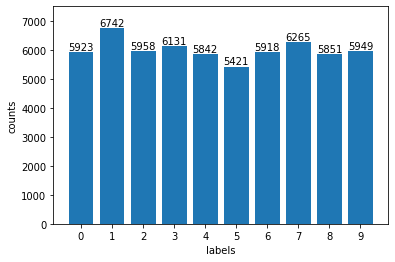

In [10]:
fig=plt.figure()
plt.bar(labels,counts,width=0.8,align="center")  # 绘制直方图
plt.xlabel("labels")  # X轴标题
plt.ylabel("counts")  # Y轴标题
plt.xticks(labels)   # X轴刻度
plt.ylim(0,7500)   # Y轴显示数值范围
for a,b in zip(labels,counts):
    plt.text(a,b,'%d' % b,ha="center",va="bottom",fontsize=10) #数据文本

In [11]:
# one-hot编码
from tensorflow.keras.utils import to_categorical
n_classes=10
Y_train = to_categorical(y_train,n_classes)
Y_test = to_categorical(y_test,n_classes)

In [12]:
Y_train[0],y_train[0],Y_train.shape,y_train.shape

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32),
 5,
 (60000, 10),
 (60000,))

## 搭建神经网络模型
    1. 全连接网络层Dense，512个神经元，输入（784，）
    2. 激活函数relu
    3. 全连接层，512神经元
    4. 激活函数relu
    5. 全连接层，10神经元
    6. 激活函数softmax

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

In [14]:
# 前向传播
model = Sequential()
model.add(Dense(512,input_shape=(784,)))
model.add(Activation("relu"))
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("softmax"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
# 反向传播
# 使用交叉熵损失函数，Adam优化器
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [27]:
model.summary()  # 搭建的神经网络结构

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
__________________________________________________

In [16]:
# 训练模型
history = model.fit(X_train, # 处理后的特征数据(784,)
                   Y_train,  # 处理后的标签(10)
                   batch_size=128,  # 每一步训练批处理128个数据
                   epochs=10,  # 所有数据训练10遍
                   verbose=2,  # 显示日志，0不显示，1显示进度条，2每轮显示
#                    validation_data=(X_test,Y_test),
                   validation_split=0.3)  # 指定验证集

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 - 2s - loss: 0.2557 - acc: 0.9253 - val_loss: 0.1331 - val_acc: 0.9608
Epoch 2/10
42000/42000 - 2s - loss: 0.0939 - acc: 0.9713 - val_loss: 0.1050 - val_acc: 0.9686
Epoch 3/10
42000/42000 - 2s - loss: 0.0539 - acc: 0.9832 - val_loss: 0.0998 - val_acc: 0.9700
Epoch 4/10
42000/42000 - 2s - loss: 0.0404 - acc: 0.9877 - val_loss: 0.1126 - val_acc: 0.9679
Epoch 5/10
42000/42000 - 2s - loss: 0.0276 - acc: 0.9910 - val_loss: 0.0913 - val_acc: 0.9751
Epoch 6/10
42000/42000 - 2s - loss: 0.0222 - acc: 0.9920 - val_loss: 0.1085 - val_acc: 0.9735
Epoch 7/10
42000/42000 - 2s - loss: 0.0153 - acc: 0.9949 - val_loss: 0.1054 - val_acc: 0.9749
Epoch 8/10
42000/42000 - 2s - loss: 0.0168 - acc: 0.9942 - val_loss: 0.1301 - val_acc: 0.9706
Epoch 9/10
42000/42000 - 2s - loss: 0.0174 - acc: 0.9943 - val_loss: 0.1068 - val_acc: 0.9741
Epoch 10/10
42000/42000 - 2s - loss: 0.0102 - acc: 0.9965 - val_loss: 0.1207 - val_acc: 0.9749


## 训练结果可视化

In [17]:
history.history  # 包含训练集的损失，准确率，验证集的损失，准确率

{'loss': [0.2557404046427636,
  0.0939321448359461,
  0.053861680277756285,
  0.0404082009040174,
  0.027640827514585995,
  0.0221729891213278,
  0.015338623120316437,
  0.0168451009234857,
  0.017390575337711545,
  0.010229743206285917],
 'acc': [0.9252857,
  0.9713333,
  0.9832381,
  0.9877143,
  0.99102384,
  0.9920476,
  0.99490476,
  0.9942143,
  0.9943333,
  0.9964524],
 'val_loss': [0.13305504454506767,
  0.105016036245558,
  0.09977936181757185,
  0.11257489807075924,
  0.09131358969211578,
  0.10850846699211332,
  0.10540752306580543,
  0.13008754329217806,
  0.10680633426043723,
  0.12072242328359022],
 'val_acc': [0.9608333,
  0.96855557,
  0.97,
  0.9678889,
  0.9750556,
  0.9735,
  0.9749445,
  0.97055554,
  0.9740555,
  0.97488886]}

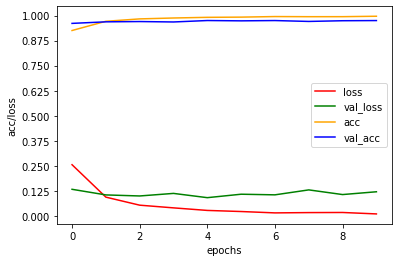

In [18]:
fig = plt.figure()
# plt.subplot(1,1,1)
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['val_loss'],color='green')
plt.plot(history.history['acc'],color='orange')
plt.plot(history.history['val_acc'],color='blue')
plt.xlabel('epochs')
plt.ylabel('acc/loss')
plt.yticks(np.linspace(0,1,9))
plt.legend(['loss','val_loss','acc','val_acc'],loc='center right')
plt.show()

In [19]:
## 保存模型
import os
import tensorflow.gfile as gfile

save_dir='./model/'
if(gfile.Exists(save_dir)):
    gfile.DeleteRecursively(save_dir)  # 存在旧模型则删除
gfile.MakeDirs(save_dir)  # 创建新的模型路径

model_name = 'mnist_6l.h5'
model_path = os.path.join(save_dir,model_name)    
model.save(model_path)
model_path

'./model/mnist_6l.h5'

## 使用现有模型

In [20]:
# 加载模型
from tensorflow.keras.models import load_model
mnist_model = load_model(model_path)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [21]:
# 统计模型在测试集上的损失及准确率
loss_and_metrics = mnist_model.evaluate(X_test,Y_test,verbose=2)

10000/10000 - 0s - loss: 0.0951 - acc: 0.9784


In [22]:
loss_and_metrics

[0.09507713382291552, 0.9784]

In [23]:
# 分类预测
predicted_classes = mnist_model.predict_classes(X_test)

In [24]:
len(np.nonzero(predicted_classes == y_test)[0]),len(np.nonzero(predicted_classes != y_test)[0])

(9784, 216)